In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn import cluster, datasets

n_samples = 1500

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)

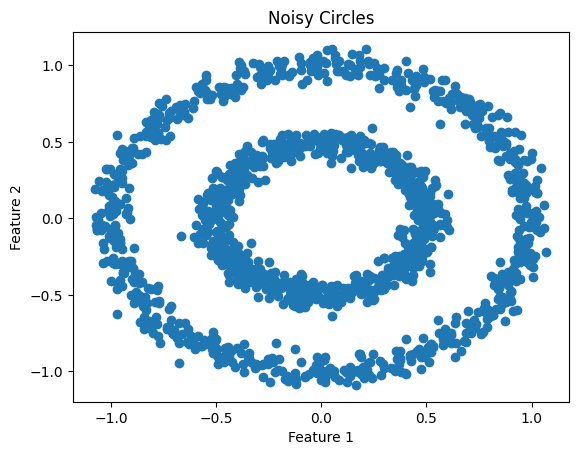

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Noisy Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, n_init='auto')
km.fit(X)
km.labels_

array([0, 1, 0, ..., 1, 0, 0], shape=(1500,), dtype=int32)

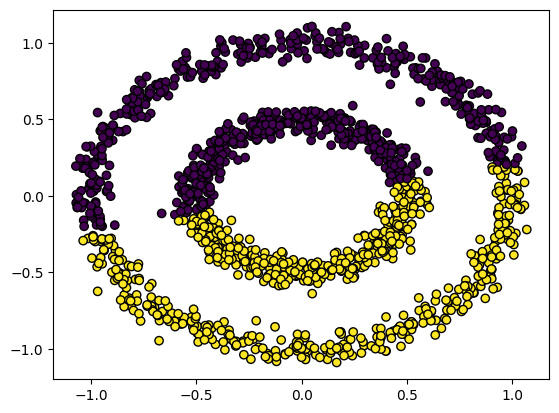

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, edgecolor='k')

In [8]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage='single')
ac.fit(X)
ac.labels_

array([1, 1, 0, ..., 1, 0, 1], shape=(1500,))

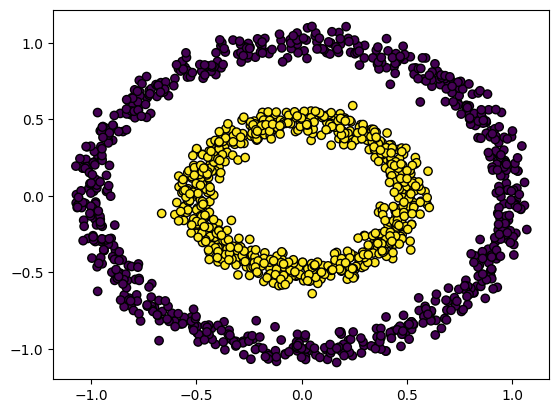

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=ac.labels_, edgecolor='k')

In [10]:
import pandas as pd

df = pd.read_excel('income.xlsx')

df

,Name,Age,Income (Thousands $)
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

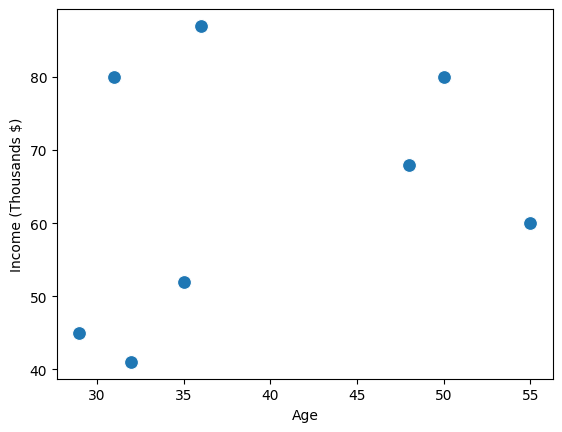

In [13]:
import seaborn as sns

sns.scatterplot(x='Age', y='Income (Thousands $)', data=df, s=100)

In [14]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='average')
hc.fit(df[['Age', 'Income (Thousands $)']])

df['cluster_hc'] = hc.labels_

<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

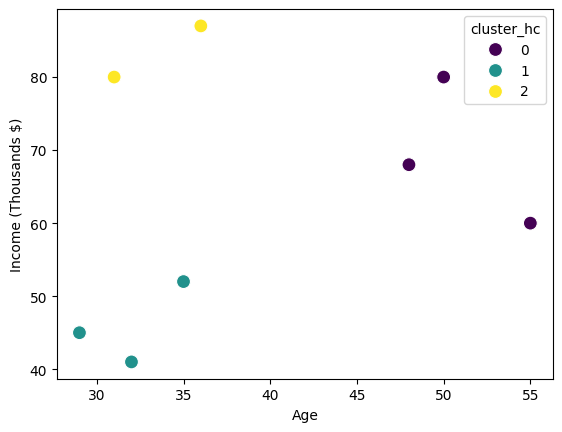

In [15]:
sns.scatterplot(x='Age', y='Income (Thousands $)', hue='cluster_hc', data=df, palette='viridis', s=100)

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(df[['Age', 'Income (Thousands $)']], method='average')

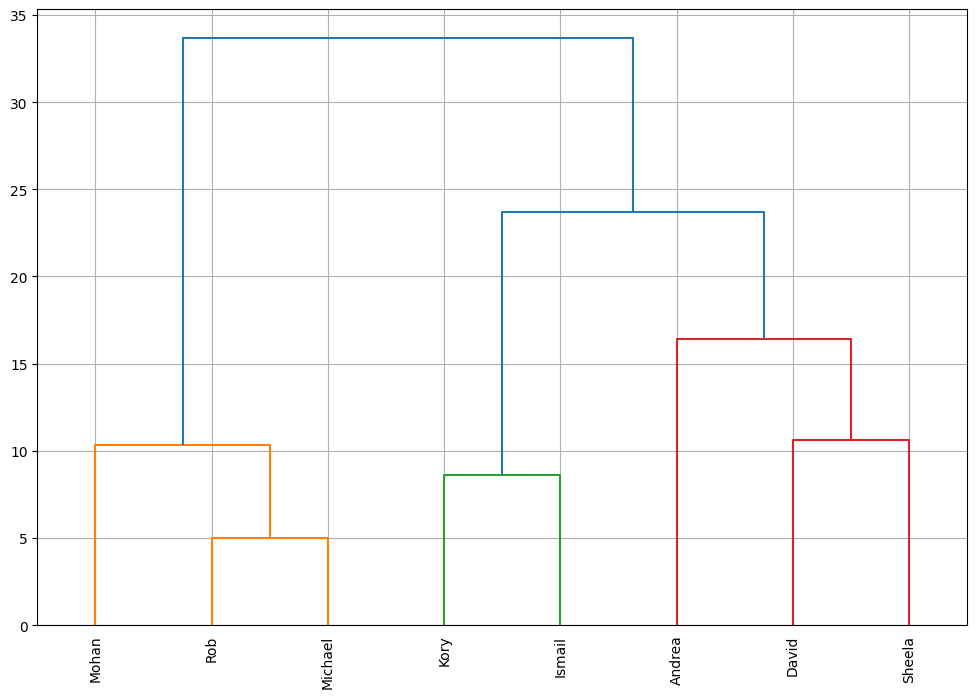

In [22]:
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df['Name'].values, leaf_rotation=90, leaf_font_size=10)
plt.grid()
plt.show()

In [24]:
clusters = fcluster(Z, 3, criterion='maxclust')
clusters

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)

In [26]:
df['cluster'] = clusters

<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

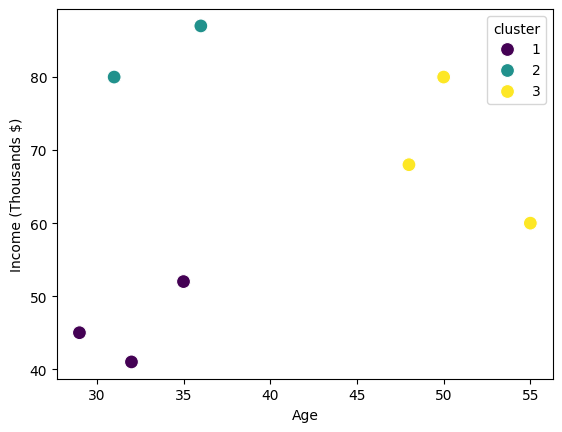

In [27]:
sns.scatterplot(x='Age', y='Income (Thousands $)', hue='cluster', data=df, palette='viridis', s=100)